<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#综述" data-toc-modified-id="综述-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>综述</a></span></li><li><span><a href="#数据的引入和format-(Alternative)" data-toc-modified-id="数据的引入和format-(Alternative)-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>数据的引入和format (Alternative)</a></span><ul class="toc-item"><li><span><a href="#参数的选取（Input）" data-toc-modified-id="参数的选取（Input）-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>参数的选取（Input）</a></span></li><li><span><a href="#Logg，误差的选取(Input:)" data-toc-modified-id="Logg，误差的选取(Input:)-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Logg，误差的选取(Input:)</a></span></li><li><span><a href="#有效温度-Teff-的限制（Input:）" data-toc-modified-id="有效温度-Teff-的限制（Input:）-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>有效温度 Teff 的限制（Input:）</a></span></li><li><span><a href="#蓝色边缘的比例，bin最小值的选取（Input：）" data-toc-modified-id="蓝色边缘的比例，bin最小值的选取（Input：）-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>蓝色边缘的比例，bin最小值的选取（Input：）</a></span></li><li><span><a href="#比较星表的数据选取（Input:）" data-toc-modified-id="比较星表的数据选取（Input:）-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>比较星表的数据选取（Input:）</a></span></li></ul></li><li><span><a href="#内禀色指数的计算（蓝色边缘方法），同时取出某一部分用于SFD判断" data-toc-modified-id="内禀色指数的计算（蓝色边缘方法），同时取出某一部分用于SFD判断-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>内禀色指数的计算（蓝色边缘方法），同时取出某一部分用于SFD判断</a></span><ul class="toc-item"><li><span><a href="#DEF" data-toc-modified-id="DEF-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>DEF</a></span></li><li><span><a href="#运算，拟合，SFD的准备（Input:)" data-toc-modified-id="运算，拟合，SFD的准备（Input:)-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>运算，拟合，SFD的准备（Input:)</a></span></li></ul></li><li><span><a href="#SFD的使用：——-将使用到新的包" data-toc-modified-id="SFD的使用：——-将使用到新的包-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>SFD的使用：—— 将使用到新的包</a></span></li><li><span><a href="#图片输出" data-toc-modified-id="图片输出-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>图片输出</a></span><ul class="toc-item"><li><span><a href="#图片保存格式（Input:)" data-toc-modified-id="图片保存格式（Input:)-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>图片保存格式（Input:)</a></span></li><li><span><a href="#绘图所需的具体量（Alternative)" data-toc-modified-id="绘图所需的具体量（Alternative)-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>绘图所需的具体量（Alternative)</a></span></li></ul></li><li><span><a href="#some-other-features" data-toc-modified-id="some-other-features-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>some other features</a></span><ul class="toc-item"><li><span><a href="#赫罗图" data-toc-modified-id="赫罗图-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>赫罗图</a></span></li><li><span><a href="#参数统计图" data-toc-modified-id="参数统计图-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>参数统计图</a></span></li></ul></li><li><span><a href="#Remember-List-for-Lamost" data-toc-modified-id="Remember-List-for-Lamost-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Remember List for Lamost</a></span><ul class="toc-item"><li><span><a href="#4月19日讨论：" data-toc-modified-id="4月19日讨论：-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>4月19日讨论：</a></span></li><li><span><a href="#5月2日组会：" data-toc-modified-id="5月2日组会：-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>5月2日组会：</a></span></li></ul></li></ul></div>

# 综述
** 蓝色边缘程序使用pandas的改写 **

_由于有一些星表中包含缺省项，我们需要使用pandas中使用dataframe读取csv中自动将缺省项补上的优势，来优化我们的自动化程式_

_(fits的文件我们可以使用topcat改变格式并且给星表瘦身，以加快程序读取速度）_

我们需要实现的功能包含以下几点：

输入：
* csv星表**_的名字_**
* 需要画的色指数的两个测光点（比如 $ J - H $ 我们需要输入$J$ 和 $H$）

程序中自带（我们所需要限定的条件）
_写在其中的某一个cell中作为 filt 条件_
* 限定的误差范围（测光数据一般选择 0.3，光谱数据可以具体再定，基本上认为不太离谱的都可以用）
* 去掉错误的点（见之前的程序)

输出：
* 颜色-teff 图

Now,trying:
* SFD: 一个新的ratio,比如说0.05，把这个ratio底下的部分输入进SFD,判断：E(B-V) <0.3 的值就是我们零消光的值。这个值去拟合一个新的curve。

# 数据的引入和format (Alternative)

In [4]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import time
import datetime
%matplotlib inline

# data_dir = '/Users/SY/Desktop/obic/data/'
data_dir = '/Users/dengdingshan/Documents/data/obic/'

In [5]:
#read as pandas
starcatalog_fram = pd.read_csv(data_dir + 'lamost_2mass_new2.csv')

###########

#starcatlog_fram = starcatlog_fram.ix[:,:517]
#print(starcatalog_fram)

In [6]:
#read parsec
parsec_fram = pd.read_csv(data_dir + 'parsec_jhkw.csv')

############

#print(parsec_fram.values)

In [7]:
### Elective CHOICE

########### I.
#change logTeff into Teff.

# def tenn(x):
#     y=10 ** x
#     return y

# Teff_tbl = starcatalog['logTeff'].apply(tenn)
###########

########### II.
#add [Teff] into DATAFRAME

#data_fram = starcatalog_fram[['TEFF_1','ERR_TEFF_1','Jmag_1','e_Jmag_1','Hmag_1','e_Hmag_1']]
#print(data_fram)
###########

########### III.
# fill the NaN blocks with 0

starcatalog_fram_fil = starcatalog_fram.fillna(0)

#print(starcatalog_fram_fil['LOGG'])
############


In [8]:
starcatalog_fram_fil.columns

Index(['col1', 'TEFF', 'ERR_TEFF', 'RA', 'DEC', 'LOGG', 'ERR_LOGG', '2MASS',
       'RAJ2000', 'DEJ2000', 'errHalfMaj', 'errHalfMin', 'errPosAng', 'Jmag',
       'Hmag', 'Kmag', 'e_Jmag', 'e_Hmag', 'e_Kmag', 'Qfl', 'Rfl', 'X',
       'MeasureJD', 'angDist'],
      dtype='object')

## 参数的选取（Input）

In [11]:
### variables

teff = 'TEFF'

color1 = 'Jmag'
color2 = 'Hmag'
err_teff = 'ERR_TEFF'

err_c1 = 'e_' + color1
#'e_' + color1
#color1 + 'err' 
#color1 + 'err'
#ERR_' + color1
#'e_' + color1

err_c2 = 'e_' + color2
#'ERR_' + color2
#'e_' + color2

## Logg，误差的选取(Input:)

In [12]:
### we just need the mainsquence (dwarf stars)

# #judge logg >3.7

starcatalog_fram_fil = starcatalog_fram_fil[(starcatalog_fram_fil['LOGG']>4.0)]
parsec_fram = parsec_fram[(parsec_fram['logg']>4.0)]                                            

In [13]:
### get the good stars

# judge  data
starcatalog_fram_fil=starcatalog_fram_fil[((starcatalog_fram_fil[err_c1] != 0) \
                                          & (starcatalog_fram_fil[err_c2] != 0)\
                                          & (starcatalog_fram_fil[err_c1] != -99) \
                                          & (starcatalog_fram_fil[err_c2] != -99))\
                                         & ((starcatalog_fram_fil[color1] != 0)\
                                           & (starcatalog_fram_fil[color2] != 0)\
                                           & (starcatalog_fram_fil[color1] != -99) \
                                           & (starcatalog_fram_fil[color2] != -99))\
                                         &((starcatalog_fram_fil[err_c1] <=0.03)\
                                          & (starcatalog_fram_fil[err_c2] <=0.03))]
### additional judgement

# starcatalog_fram_fil=starcatalog_fram_fil[(starcatalog_fram_fil[err_c1] <=0.2)\
#                                            &(starcatalog_fram_fil[err_c2] <=0.05)]

print(starcatalog_fram_fil.iloc[:,0].size)

45834


In [14]:
### draw the png of errTeff 

# plt.figure(3)
# plt.xlabel('$T_\mathrm{eff}(K)$',fontsize=14)
# plt.ylabel('$σ_\mathrm{Teff}$',fontsize=14)
# plt.scatter(starcatalog_fram_fil[teff],starcatalog_fram_fil[err_teff],\
#             c='steelblue',s=8, edgecolors='None',alpha=0.2,label='$σ_\mathrm{Teff}$(LAMOST)')
# plt.legend(loc='lower right')
# plt.xticks(fontsize=12)
# plt.yticks(fontsize=12)
# plt.savefig(savename3,dpi=200)  
# plt.show()

### 

In [15]:
# cut source g-r:0.440
origin = starcatalog_fram_fil
# starcatalog_fram_fil=starcatalog_fram_fil[(starcatalog_fram_fil[color1]-starcatalog_fram_fil[color2]>= -0.440)\
#                                          & (starcatalog_fram_fil[color1]>=12)]

## 有效温度 Teff 的限制（Input:）

In [16]:
#filt the good one
#apogee_tbl_fil = apogee_tbl[np.argwhere(np.logical_and(apogee_tbl['teff'] > 0, apogee_tbl['logg'] > -3))]
#apogee_tbl_fil = apogee_tbl_fil[np.argwhere(np.logical_and(apogee_tbl_fil['j'].flatten() > -1, \
#                                                           apogee_tbl_fil['h'].flatten() > -1))]
#USE goodOB 


starcatalog_fram_fil=starcatalog_fram_fil[(((starcatalog_fram_fil[err_teff] != 0 )\
                                          & (starcatalog_fram_fil[teff]>= 10000))\
                                          #& (starcatalog_fram_fil[teff]<= 16000))
                                          & (((starcatalog_fram_fil[err_teff]< 630)\
                                          &(starcatalog_fram_fil[teff]> 9000))\
                                          |((starcatalog_fram_fil[err_teff]< 500)\
                                          & (starcatalog_fram_fil[teff]<= 9000))))]
print(np.max(starcatalog_fram_fil[teff]))

25258.838


## 蓝色边缘的比例，bin最小值的选取（Input：）

In [18]:
# Determine the input numbers.

# Bin width, usually 50 (for more scatter, try 1000 or other figures)
#bin_width = 1000

# Ratio of the bluest edge, usually 5%
rat = 5

# Low end criteria. If the number in a bin is lower than this number then neglect.  
low_crit = 50

In [19]:
# input the data of Bessell. M.S. & Brett. J.M. 1988
# BBFrame is the dataframe of the ic data 

BBFrame=pd.DataFrame({'J-H':[-0.09,-0.08,-0.07,-0.06,-0.05,-0.03,-0.03,-0.01,0.0,0.02,0.06],\
                      'Teff':[22300,19000,17200,15400,14100,13000,11800,10700,9480,8810,8160]})


## 比较星表的数据选取（Input:）

In [20]:
# parsec point
parsecframe = parsec_fram[((parsec_fram['Age'] == 3980000)\
                           &(parsec_fram['logTe'] <= 4.361)\
                           &(parsec_fram['logTe'] >= 4.000))]
parsec_teff =10**parsecframe['logTe'] 
parsec_color = parsecframe[color1] - parsecframe[color2]
#print(parsecframe.values)
                                         

In [21]:
# Find the start point and bin number of Teff. 
# Start point: the first number divisible by bin_width smaller than min(teff)
# Bin number: Start from start point and cover all the teff range.


#teff_start = min(apogee_tbl_fil['teff']) - min(apogee_tbl_fil['teff']) % (bin_width/2)
#bin_number = math.ceil((max(apogee_tbl_fil['teff']) - teff_start) / bin_width)

#teff_start = min(starcatalog_fram_fil[teff])-min(starcatalog_fram_fil[teff])%(bin_width / 2)

teff_start= 10000

#bin_number = math.ceil((max(starcatalog_fram_fil[teff])-teff_start) / bin_width)


In [22]:
#filt BBFrame
BBFrame_fil=BBFrame[BBFrame['Teff'] >= teff_start]

# 内禀色指数的计算（蓝色边缘方法），同时取出某一部分用于SFD判断

## DEF

In [23]:
def data(teff_start,ratio,low_crit,ratio_SFD):
    
    start_time = time.time()
    int_teff = []
    int_color = []
    bin_int_color = []
    
    SFD_RA = []; SFD_DEC = []; SFD_TEFF = []; SFD_color1 = []; SFD_color2 = [];
    
    data_final = pd.DataFrame(columns=[teff,color1,color2])
    teff_judge = teff_start
    while teff_judge < np.max(starcatalog_fram_fil[teff]) - 1000:
       
        if teff_judge <9000:
            bin_width = 100
        else:
            bin_width = 630

        bin_tbl =starcatalog_fram_fil[np.logical_and(starcatalog_fram_fil[teff] > teff_judge, \
                                                starcatalog_fram_fil[teff] < teff_judge+bin_width)]

        #print(teff_judge)
       
        
        if len(bin_tbl) < low_crit:
            teff_judge = teff_judge+bin_width
            continue
            
        source_num = 0
        #print(len(bin_tbl))

        while source_num != len(bin_tbl):
            source_num = len(bin_tbl)

        data_final = data_final.append(bin_tbl[[teff,color1,color2]])
        #print(len(bin_tbl))

        int_teff.append(float(teff_judge+bin_width/2))
        bin_tbl['color'] = bin_tbl[color1]-bin_tbl[color2]
        bin_sort = bin_tbl.sort_index(axis = 0,ascending = True,by = 'color')
        
        # 每个bin中前ratio_SFD的部分用于取得ebv
        color_SFD = bin_sort['color'].values[:math.ceil(len(bin_tbl)*ratio_SFD/100)]
        bin_tbl_SFD = bin_sort[(bin_sort['color']<=np.max(color_SFD))]
        
        for ppp in range(len(bin_tbl_SFD)):
            SFD_RA.append(bin_tbl_SFD['RA'].values[ppp])
            SFD_DEC.append(bin_tbl_SFD['DEC'].values[ppp])
            SFD_TEFF.append(bin_tbl_SFD['TEFF'].values[ppp])
            SFD_color1.append(bin_tbl_SFD[color1].values[ppp])
            SFD_color2.append(bin_tbl_SFD[color2].values[ppp])
        
        # 每个bin中前ratio(usually 5%)的部分 用于取得内禀色指数int_color
        color5 = bin_sort['color'].values[:math.ceil(len(bin_tbl)*ratio/100)]
        bin_tbl_5 = bin_sort[(bin_sort['color']<=np.max(color5))]
        
        if len(color5) != 0:
            bin_mean = np.median(color5)
            bin_sigma = np.std(color5)
            bin_int_color = color5\
            [((color5<= bin_mean+3*bin_sigma)\
            & (color5>= bin_mean-3*bin_sigma))]

            int_color.append(np.median(bin_int_color))
            
        teff_judge = teff_judge+bin_width
        
    SFD_tbl_final = pd.DataFrame({'TEFF':np.array(SFD_TEFF),'RA':np.array(SFD_RA),\
                                  'DEC':np.array(SFD_DEC),color1:np.array(SFD_color1),\
                                 color2:np.array(SFD_color2)})
    
    print(time.time() - start_time)
    print(int_teff,int_color)
#     print(bin_mean)
#     print(data_final.iloc[:,0].size)
    return int_teff,int_color,data_final,SFD_tbl_final

## 运算，拟合，SFD的准备（Input:)

In [27]:
# SFD ratio

ratio_SFD = 50

# fitting curve
int_teff,int_color,data_final,SFD_tbl_ratio = data(teff_start,rat,low_crit,ratio_SFD)

fc = np.polyfit(int_teff, int_color, 3)#用3次多项式拟合
fitcurve = np.poly1d(fc)
# print(fitcurve) #在屏幕上打印拟合多项式

colorvals=fitcurve(int_teff)

# print(len(colorvals),len(int_teff))
#print(len(bin_tbl_final[teff].values))

# SFD_tbl_ratio[teff]


0.1161031723022461
[11575.0, 14725.0] [0.39400000000000013, -0.0135000000000014]


/Users/dengdingshan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/dengdingshan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
/Users/dengdingshan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: RankWarning: Polyfit may be poorly conditioned
  


# SFD的使用：—— 将使用到新的包

1. 选取SFD中Ebv小于某一个值的认为是零消光源（Lamost)——Thins page
2. 用目前的色指数减去 Ebv 给出的消光值，然后去归算内禀色指数 - GOSSS

In [25]:
## use SFD dustmap
from __future__ import print_function
from astropy.coordinates import SkyCoord
from astropy import units as u
from dustmaps.sfd import SFDQuery

sfd = SFDQuery()

## ebv前的系数需要去文献中拿到。目前使用的是r和i的
# Const1 = 0.709 #J #3.303 #g #2.285 #r 
# Const2 = 0.449 #H #2.285 #r #1.698 #i

time_start = time.time()
SFD_catalog_color = []
SFD_catalog_teff = []
lens = len(SFD_tbl_ratio)

ebv_final = []

# 判断ebv < 0.05，就拿入下一个数组，最后一起画在图上
print(lens)
for i in range(lens):
    coords = SkyCoord(SFD_tbl_ratio['RA'].values[i],SFD_tbl_ratio['DEC'].values[i],\
                      frame = 'icrs',unit = 'deg')
    ebv = sfd(coords)
    ebv_final.append(ebv)
    
#     A_c1 = Const1*ebv;
#     A_c2 = Const2*ebv;

    if ebv < 0.05:
        SFD_colorindex = SFD_tbl_ratio[color1].values[i]\
        - (SFD_tbl_ratio[color2].values[i])
        SFD_catalog_color.append(SFD_colorindex)
    
        SFD_catalog_teff.append(SFD_tbl_ratio[teff].values[i])
        print(i)
#     print(i)

print(time.time() - time_start)

81
2
12
16
17
18
31
37
44
3.431128740310669


# 图片输出

## 图片保存格式（Input:)

In [92]:
### figures & Savename
cc1 = 'J'
cc2 = 'H'

save = data_dir + 'pictures/'
# save = '/Users/SY/Desktop/obic/picture/'

i = datetime.datetime.now()
date_now = "%s_%s_%s_" % (i.year, i.month, i.day) 
ylabel = '$%s - %s$'%(cc1,cc2) 
savename1 = save + date_now + cc1 + cc2 + 'logg3'+'.png'
savename2 = save + date_now + cc1 + '_HR_' + cc2 +'.png'
savename3 = save + date_now + 'errteff.png'

savename5 = save + date_now + cc1 + cc2 + '_logg3_SFD'+'50%'+'.png'


In [93]:
# plt hist of ebv

# plt.hist(ebv_final,1000)
# plt.savefig(save+'ebv.png',dpi = 200)
# plt.xlim(0,2)
# plt.show()

# 拟合SFD

fcc = np.polyfit(SFD_catalog_teff, SFD_catalog_color, 3)#用3次多项式拟合 SFD
fitcurve = np.poly1d(fcc)
print(fitcurve) #在屏幕上打印拟合多项式

SFD_vals = fitcurve(SFD_catalog_teff)



            3             2
-1.836e-12 x + 8.411e-08 x - 0.001223 x + 5.667


## 绘图所需的具体量（Alternative)

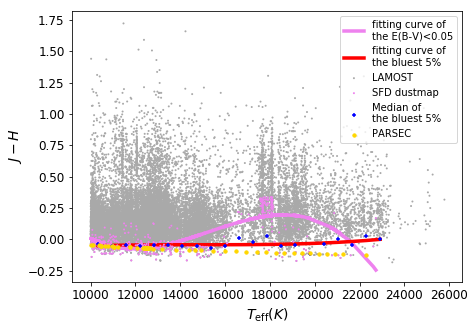

In [94]:
#PLT
plt.figure(1,figsize=(7, 5))  
plt.xlabel('$T_\mathrm{eff}(K)$',fontsize=14)
plt.ylabel(ylabel,fontsize=14)
#plt.ylim(-4,9)

# the data we use
plt.scatter(starcatalog_fram_fil[teff], starcatalog_fram_fil[color1]-starcatalog_fram_fil[color2],\
            c='darkgray',s=4, edgecolors='None',label='LAMOST')

# data we use in the SFD dustmap
plt.scatter(SFD_catalog_teff,SFD_catalog_color,alpha=1,edgecolors='None',c='violet',s=4,label='SFD dustmap',zorder=2)

# SFD fitcurve
plt.plot(SFD_catalog_teff, SFD_vals, c='violet',linewidth = 3.5,label='fitting curve of \nthe E(B-V)<0.05',zorder=1)

# ic plot from blue edge
plt.plot(int_teff, colorvals, c='r',linewidth = 3.5,label='fitting curve of \nthe bluest 5%',zorder=1)

# ic from blue edge
plt.scatter(int_teff, int_color, edgecolors='None',c='b', marker = '+',s=11,label='Median of\nthe bluest 5%',zorder=2)

# ic from Allen's work 
# plt.scatter(BBFrame_fil['Teff'],BBFrame_fil['J-H'],c='lime',s=11,label='Allen',zorder=2)

# ic from parsec
plt.scatter(parsec_teff,parsec_color,c='gold',s=11,label='PARSEC',zorder=2)

### Draw the plot

# plt.xlabel('$T_\mathrm{eff}$'); plt.ylabel(ylabel)
#plt.scatter(BBFrame_fil['Teff'],BBFrame_fil['J-H'],c='#FF6666',s=11,label='Allen')

plt.legend(loc='upper right')
#new_ticks = np.linspace(-1,2,7)
#plt.yticks(new_ticks)
# plt.ylim(np.min(starcatalog_fram_fil[color1] - starcatalog_fram_fil[color2]) - 0.5,\
#         np.max(starcatalog_fram_fil[color1] - starcatalog_fram_fil[color2]))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
# plt.savefig(savename1,dpi=200)
plt.savefig(savename5,dpi=200)
plt.show()

# some other features

## 赫罗图

5


TypeError: data() missing 1 required positional argument: 'ratio_SFD'

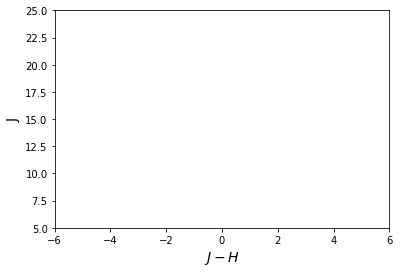

In [84]:
# H-R 1
plt.figure(2)
plt.xlabel(ylabel,fontsize=14); plt.ylabel(cc1,fontsize=14)
plt.xlim(-6,6)
plt.ylim(5,25)
# for rat in ratio:
print(rat)
int_teff,int_color,data_final = data(teff_start,rat,low_crit)

cm = plt.cm.get_cmap('RdYlBu')
sc = plt.scatter(origin[color1]-origin[color2], origin[color1],\
            c= 'darkgray',s=5,edgecolors = 'None',alpha = 1,cmap=cm,label='all sources')
plt.scatter(data_final[color1]-data_final[color2], data_final[color1],\
             c='g',s=5, edgecolors='None', alpha=1,label='selected sources')
#plt.colorbar(sc)
plt.legend(loc='upper right')
# new_ticks = np.linspace(-2,3,18)
# plt.xticks(new_ticks)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig(savename2,dpi=200)    
plt.show()

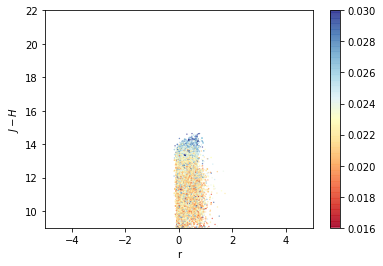

In [43]:
# 赫罗图 2
plt.xlabel('r')
plt.ylabel(ylabel)

cm = plt.cm.get_cmap('RdYlBu')

sc = plt.scatter(starcatalog_fram_fil[color1]-starcatalog_fram_fil[color2],starcatalog_fram_fil[color1],\
            c = starcatalog_fram_fil[err_c1],s=2,edgecolors = 'None',alpha = 0.7,cmap=cm)

plt.colorbar(sc)

plt.xlim(-5,5)
plt.ylim(9,22)
plt.savefig(save+'HR.png',dpi=200)
plt.show()

## 参数统计图

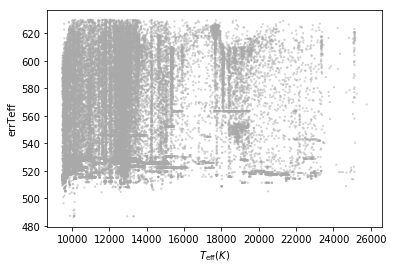

In [44]:
plt.figure(3)
plt.xlabel('$T_\mathrm{eff}(K)$')
plt.ylabel('errTeff')
plt.scatter(starcatalog_fram_fil[teff],starcatalog_fram_fil[err_teff],\
            c='darkgray',s=5, edgecolors='None', alpha=0.5)
plt.show()

# Remember List for Lamost

## 4月19日讨论：

1. log g > 4.0 比较可靠
2. 16000-18000之间的这个区域很特别，似乎色指数就是偏红了
3. Lamost最早也只到B2
4. O-type 使用SFD的老方法——减去 SFD 的 E(B-V)，获得所有源的内禀色指数
5. 向紫外波段扩充

## 5月2日组会：

** 苑老师 **： Lamost DR5 和 Mr.Yuan 给的星表由参数上的差别（跑的不同的pipline)